# Utilisation des k-means pour le traitement d'images

In [1]:
#on importe les bibliothèques habituelles
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# on utilise aussi seaborn pour avoir des graphiques plus "user-friendly"
import seaborn as sns; sns.set()

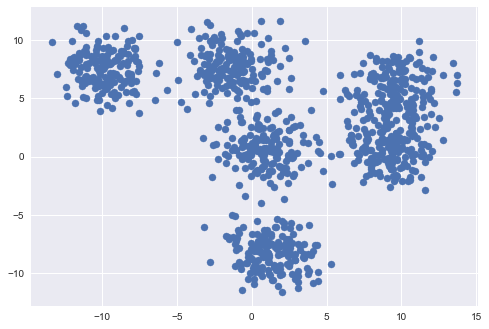

In [2]:
#on va créer des nuages de points (1000 obs réparties dans 6 groupes)
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=1000,n_features=4, centers=6,
                  random_state=0, cluster_std=1.60)
plt.scatter(X[:, 0], X[:, 3], s=50);

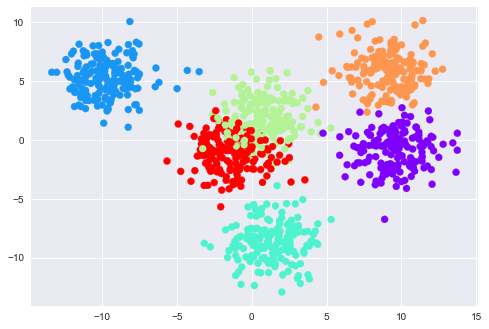

In [3]:
#on applique les k-means pour obtenir la classification en 6 groupes
from sklearn.cluster import KMeans
est = KMeans(6)  # 6 classes
est.fit(X)
y_kmeans = est.predict(X)

plt.scatter(X[:, 0], X[:,2], c=y_kmeans,  cmap='rainbow');

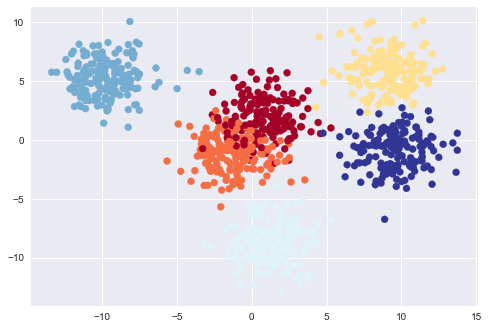

In [4]:
plt.scatter(X[:, 0], X[:,2], c=y, cmap='RdYlBu');

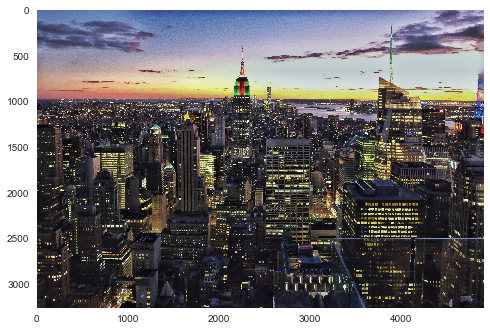

In [5]:
#on va utiliser les k-means pour baisser la résolution d'une image
#on prend l'image New York du site STAT4DECISION
#on utilise misc de scipy
#attention, il faut que la bibliothèque PIL soit installée
from scipy import misc
face = misc.imread('New York.jpg')
import matplotlib.pyplot as plt
plt.imshow(face)
plt.grid(False);

In [6]:
#l'objet obtenu est un objet 3D
#avec les coordonnées et la couleur
face.shape 

(3264, 4896, 3)

In [10]:
#on va réduire la taille de l'image et passer à 8 couleurs
image = face[::3, ::3]
n_colors = 8

image.shape

(1088, 1632, 3)

In [11]:
#on va transformer cet objet en objet en 2 dimanesions    
X = (image / 255.0).reshape(-1, 3)
X.shape

(1775616, 3)

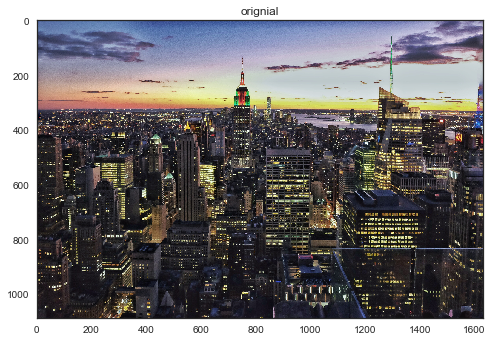

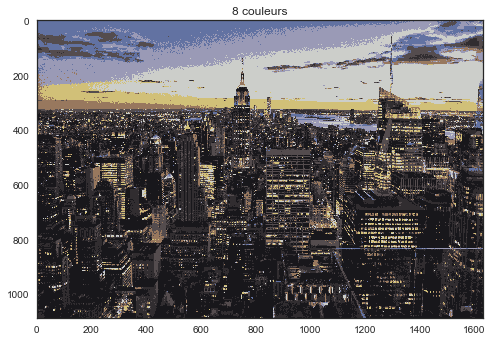

In [12]:
#on lance les k-means avec 8 groupes
model = KMeans(n_colors)
#on reconstruit l'image à partir des résultats de la classification
labels = model.fit_predict(X)
colors = model.cluster_centers_
new_image = colors[labels].reshape(image.shape)
new_image = (new_image * 255.0).astype(np.uint8)

#on affiche les images original / transformées
with sns.axes_style('white'):
    plt.figure()
    plt.imshow(image)
    plt.title('orignial')

    plt.figure()
    plt.imshow(new_image)
    plt.title('{0} couleurs'.format(n_colors))